In [ ]:
# neural network models for time series prediction using the Keras deep learning library
# Stock Market Prediction And Forecasting Using Stacked LSTM, Keras and Tensorflow
# Alibaba BABA stock prediction

In [2]:
import pandas as pd
import numpy as np, array
import pandas_datareader.data as pdr
import math
from datetime import datetime

from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (16,8)

import seaborn as sns
sns.set_style('whitegrid')

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM


In [3]:
# extract data from yahoo finance
df = pdr.DataReader('BABA','yahoo')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-02-01,67.699997,65.349998,66.500000,67.029999,16213800,67.029999
2016-02-02,67.739998,64.660004,67.050003,65.089996,19150800,65.089996
2016-02-03,65.730003,60.869999,65.599998,63.439999,31918600,63.439999
2016-02-04,65.720001,63.099998,64.330002,64.860001,22911500,64.860001
2016-02-05,64.860001,62.180000,64.709999,62.639999,12842800,62.639999
...,...,...,...,...,...,...
2021-01-25,265.200012,257.850006,263.619995,261.380005,19478600,261.380005
2021-01-26,266.000000,261.119995,263.799988,265.920013,14681200,265.920013
2021-01-27,265.920013,259.950012,265.130005,260.250000,16050400,260.250000


In [4]:
# grab Daily Close price series
df1=df.Close

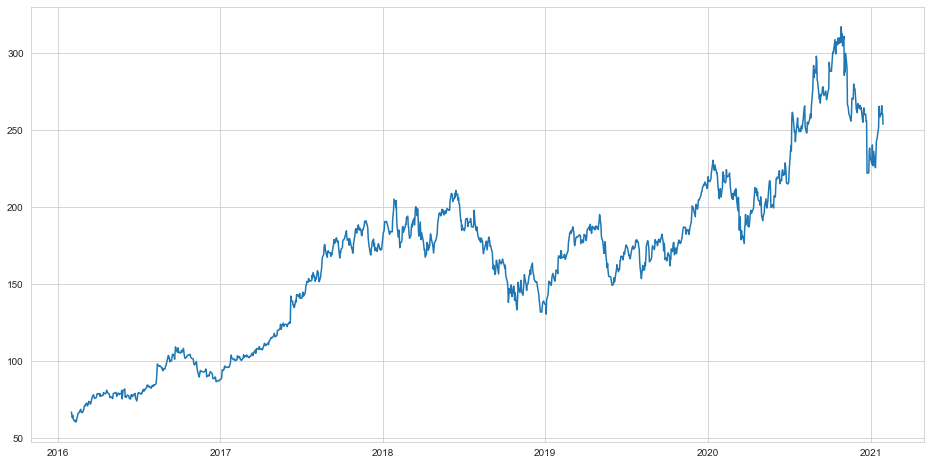

In [5]:
plt.plot(df1)

In [6]:
# Data Normalization by min-max scaling

scaler = MinMaxScaler(feature_range=(0,1))
df2=scaler.fit_transform(np.array(df1).reshape(-1,1))
df2

# number of rows in Close price data set
df2.shape

(1259, 1)

In [7]:
# splitting dataset into train and test split

training_size = math.ceil(int(len(df2)*0.8))
test_size = len(df2)- training_size

train_data, test_data = df2[0:training_size,:], df2[training_size:len(df2),:]

In [8]:
training_size, test_size

(1007, 252)

In [9]:
train_data.shape

(1007, 1)

In [10]:
test_data.shape

(252, 1)

In [11]:
# convert input array into X and Y dataset with time step, reshape into e.g. X=t,t+1,t+2,t+3 and Y=t+4 for time series prediction
def create_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i + time_step), 0]
        X.append(a)
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

In [12]:
time_step = 100

X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [13]:
print(X_train.shape), print(y_train.shape)

(906, 100)
(906,)


(None, None)

In [14]:
print(X_test.shape), print(y_test.shape)

(151, 100)
(151,)


(None, None)

In [15]:
# reshape X input as dimensions of samples, time steps, features for LSTM model
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1], 1)

In [16]:
X_train.shape
X_test.shape

(151, 100, 1)

In [17]:
## Build Stacked LSTM model
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(loss='mean_squared_error',optimizer='adam')

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [19]:
# train model
model.fit(X_train,y_train,validation_data=(X_test,y_test), epochs=10, batch_size=64, verbose=1)

Epoch 1/10
15/15 [==============================] - 17s 480ms/step - loss: 0.0631 - val_loss: 0.0856
Epoch 2/10
15/15 [==============================] - 4s 292ms/step - loss: 0.0066 - val_loss: 0.0409
Epoch 3/10
15/15 [==============================] - 4s 268ms/step - loss: 0.0034 - val_loss: 0.0115
Epoch 4/10
15/15 [==============================] - 4s 248ms/step - loss: 0.0018 - val_loss: 0.0065
Epoch 5/10
15/15 [==============================] - 4s 283ms/step - loss: 0.0013 - val_loss: 0.0060
Epoch 6/10
15/15 [==============================] - 5s 314ms/step - loss: 0.0011 - val_loss: 0.0060
Epoch 7/10
15/15 [==============================] - 5s 332ms/step - loss: 0.0011 - val_loss: 0.0046
Epoch 8/10
15/15 [==============================] - 5s 338ms/step - loss: 0.0012 - val_loss: 0.0051
Epoch 9/10
15/15 [==============================] - 4s 263ms/step - loss: 0.0012 - val_loss: 0.0066
Epoch 10/10
15/15 [==============================] - 4s 262ms/step - loss: 0.0011 - val_loss: 0.006

In [30]:
# Prediction & check performance metrics
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)


In [21]:
# Inverse transform predictions
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [22]:
# Training RMSE
math.sqrt(mean_squared_error(y_train,train_predict))

156.00190539744668

In [23]:
# Testing RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

252.29282520399164

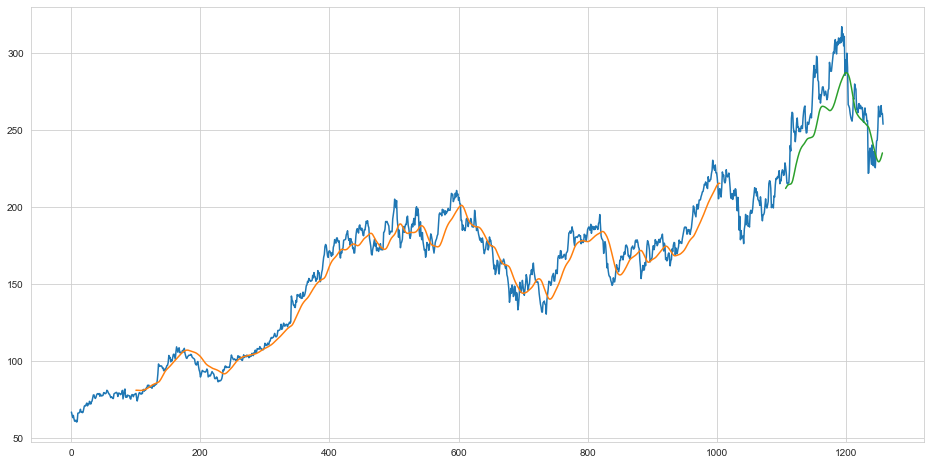

In [24]:
# shift train predictions for plotting
timestep=100

trainPredictPlot = np.empty_like(df2)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[timestep:len(train_predict)+timestep, :] = train_predict

# shift test predictions for plotting
testPredictPlot = np.empty_like(df2)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(timestep*2)+1:len(df2)-1, :] = test_predict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(df2)) #baseline

plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)

plt.show()

In [33]:
x_input=test_data[341:,:].reshape(1,-1)
x_input.shape

(1, 0)

In [26]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [41]:
# demonstrate prediction for next 10 days
lst_output=[]
n_steps=100
i=0

while(i<30):
    
    if(len(temp_input)>100):
       
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))

        
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]

        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

print(lst_output)

ValueError: cannot reshape array of size 0 into shape (1,100,1)

In [34]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

ValueError: x and y must have same first dimension, but have shapes (100,) and (101, 1)

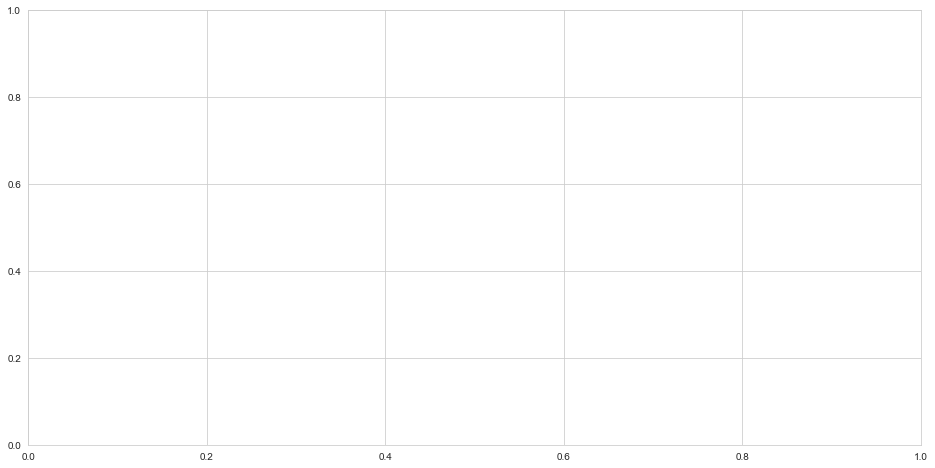

In [36]:
plt.plot(day_new,scaler.inverse_transform(df2[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

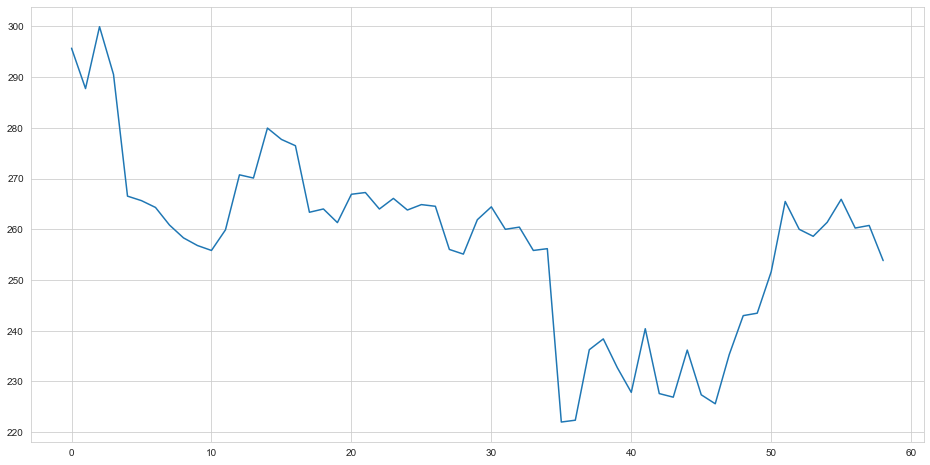

In [40]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [38]:
df4=scaler.inverse_transform(df3).tolist()

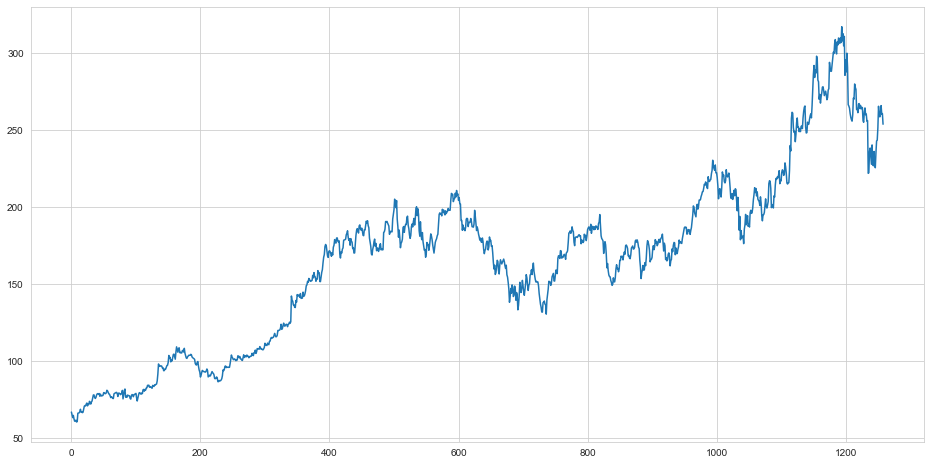

In [39]:
plt.plot(df4)